In [1]:
from ML_point_tf import *
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
sess = tf.InteractiveSession()
maml = MAML_HB()
merged_summary = tf.summary.merge_all()

tf.global_variables_initializer().run()

train_writer = tf.summary.FileWriter("logs", sess.graph)

for i in range(2500):
    tasks = draw_sin_tasks(25)
    summary, _, loss, theta = sess.run([merged_summary, maml.train_op, maml.loss, maml.theta], feed_dict={tp: task for tp, task in zip(maml.tasks, tasks)})
        
    train_writer.add_summary(summary, i)
    if i % 100 == 0:
        print("Iter {}:".format(i), loss)

In [2]:
def sample_sin_test_pts(K, amplitude, phase):
    input_points = np.random.uniform(-5, 5, K)
    output_points = amplitude * np.sin(input_points + phase)
    print(np.expand_dims(input_points.T, axis=1).astype("float32").shape)
    return np.expand_dims(input_points.T, axis=1).astype("float32"), np.expand_dims(output_points.T, axis=1).astype("float32")

In [3]:
sample_sin_test_pts(5, .5, np.pi/2)

(5, 1)


(array([[ 4.96605253],
        [ 1.11132348],
        [-3.64210534],
        [-0.89314336],
        [ 0.43471563]], dtype=float32), array([[ 0.12547596],
        [ 0.22173782],
        [-0.43866834],
        [ 0.31348315],
        [ 0.45349494]], dtype=float32))

In [4]:
def plot_points_with_sin(train_pts, test_pts, amplitude, phase, i, save=False):
    t = np.arange(-5, 5, 0.1)
    fig = plt.figure()
    plt.plot(t, amplitude*np.sin(t + phase))
    plt.grid(True)
    plt.plot(train_pts[0], train_pts[1], "go")
    plt.plot(test_pts[0], test_pts[1], "ro")
    plt.title("Iter={}".format(i))
    
    if save:
        fig.savefig("{}.png".format(i), bbox_inches='tight')

In [5]:
def eval_theta(maml, i, save_fig):
    task = [.5, np.pi/2]
    K = 15
    inps, outs = sample_sin_test_pts(K, task[0], task[1])

    test_ins = np.expand_dims(np.arange(-5, 5, 1).T, axis=1).astype("float32")
    inp_placeholder = tf.placeholder(tf.float32, (K,1))
    test_outs = maml.finetune_and_test(inp_placeholder, outs, 15, test_ins)
    test_outs_ = sess.run([test_outs], feed_dict={inp_placeholder: inps})[0]
    
    plot_points_with_sin((inps, outs), (test_ins, test_outs_), task[0], task[1], i, save_fig)

(15, 1)


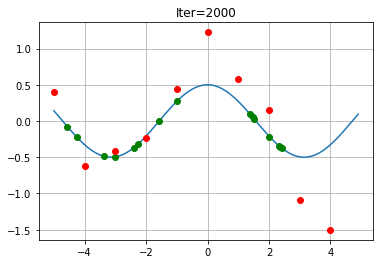

In [66]:
eval_theta(maml, 2000, True)

# Real code lol

In [ ]:
sess = tf.InteractiveSession()
maml2 = MAML_HB()
merged_summary = tf.summary.merge_all()

tf.global_variables_initializer().run()

train_writer = tf.summary.FileWriter("logs", sess.graph)

for i in range(70000):
    tasks = draw_sin_tasks(25)
    summary, _, loss, theta = sess.run([merged_summary, maml2.train_op, maml2.loss, maml2.theta], feed_dict={tp: task for tp, task in zip(maml2.tasks, tasks)})
        
    train_writer.add_summary(summary, i)
    if i % 100 == 0:
        print("Iter {}:".format(i), loss)
    if i % 2500 == 0:
        eval_theta(maml2, i, True)
        np.save("theta-{}.npy".format(i), theta)

Iter 0: 4.72019
(15, 1)
Iter 100: 3.50511
Iter 200: 3.29645
Iter 300: 3.23407
Iter 400: 3.78946
Iter 500: 4.40636
Iter 600: 3.33761
Iter 700: 3.09332
Iter 800: 2.60348
Iter 900: 3.75521
Iter 1000: 2.51367
Iter 1100: 3.16476
Iter 1200: 3.1392
Iter 1300: 2.38266
Iter 1400: 3.72258
Iter 1500: 2.30586
Iter 1600: 2.15914
Iter 1700: 2.22751
Iter 1800: 2.84572
Iter 1900: 2.88699
Iter 2000: 2.1188
Iter 2100: 1.86341
Iter 2200: 1.91497
Iter 2300: 2.54391
Iter 2400: 2.93583
Iter 2500: 2.28063
(15, 1)
Iter 2600: 2.45407
Iter 2700: 2.42478
Iter 2800: 2.6099
Iter 2900: 2.20178
Iter 3000: 2.08367
Iter 3100: 2.44474
Iter 3200: 2.11348
Iter 3300: 1.92527
Iter 3400: 1.92528
Iter 3500: 2.82401
Iter 3600: 2.86561
Iter 3700: 2.00213
Iter 3800: 2.25066
Iter 3900: 1.67703
Iter 4000: 2.04499
Iter 4100: 2.48056
Iter 4200: 1.18593
Iter 4300: 2.22036
Iter 4400: 1.24745
Iter 4500: 1.81137
Iter 4600: 1.79159
Iter 4700: 2.78435
Iter 4800: 1.62423
Iter 4900: 2.26427
Iter 5000: 1.65698
(15, 1)
Iter 5100: 1.87134
Ite

# Linear model eval

In [ ]:
import linear_model

In [ ]:
sess = tf.InteractiveSession()
maml2 = MAML_HB()
merged_summary = tf.summary.merge_all()

tf.global_variables_initializer().run()

train_writer = tf.summary.FileWriter("logs", sess.graph)

for i in range(70000):
    tasks = draw_sin_tasks(25)
    summary, _, loss, theta = sess.run([merged_summary, maml2.train_op, maml2.loss, maml2.theta], feed_dict={tp: task for tp, task in zip(maml2.tasks, tasks)})
        
    train_writer.add_summary(summary, i)
    if i % 100 == 0:
        print("Iter {}:".format(i), loss)
    if i % 2500 == 0:
        eval_theta(maml2, i, True)
        np.save("theta-{}.npy".format(i), theta)